<a href="https://colab.research.google.com/github/Faouzi-Slimi/Tensorflow-Certification/blob/main/Linear_Regression_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Simple Linear Regression with Synthetic Data

#1. Import module

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#2.Define functions that build and train a model

In [ ]:
def build_model(my_learning_rate):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
  model.compile(loss="mean_squared_error",
                optimizer = tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

def train_model(model,x_train,y_train,epochs):
  history = model.fit(x_train,y_train,epochs=epochs)
  

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")



Defined create_model and train_model


##3.Define plotting functions

In [ ]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


##4.Create the data

In [ ]:
x_train = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
y_train   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 314ms/step - loss: 754.8359 - root_mean_squared_error: 27.4743
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 740.5688 - root_mean_squared_error: 27.2134
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 730.3501 - root_mean_squared_error: 27.0250
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 721.8716 - root_mean_squared_error: 26.8677
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 714.4022 - root_mean_squared_error: 26.7283
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 707.6030 - root_mean_squared_error: 26.6008
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 701.2852 - root_mean_squared_error: 26.4818
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 695.3315 - root_mean_squared_error: 26.3691
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 689.6636 - root_mean_squ

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


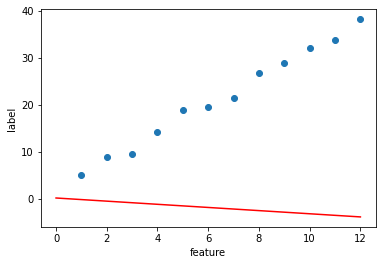

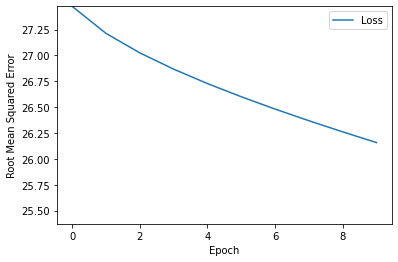

In [ ]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, x_train, 
                                                         y_train, epochs)
plot_the_model(trained_weight, trained_bias, x_train, y_train)
plot_the_loss_curve(epochs, rmse)